<a href="https://colab.research.google.com/github/Raishaaam/infrastruktur-dan-platform-untuk-sains-data-assigment/blob/main/MODUL%203/guided%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi

from sklearn.impute import KNNImputer #imputasi
from imblearn.over_sampling import SMOTE #over_sampling
from wordcloud import WordCloud #visualisasi kata


In [ ]:
df = pd.read_csv('/content/diabetes - diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.0,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.0,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1


In [ ]:
df.isnull().sum()/len(df)*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [ ]:
# Function to count outliers using IQR

def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum()

# Count outliers in each numerical column
outliers_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outliers_counts[col] = count_outliers_iqr(df[col])

# Convert the results into a DataFrame for easier viewing
outlier_count_df = pd.DataFrame(list(outliers_counts.items())), ['Column', 'Outlier Count']

# Display the DataFrame
print(outlier_count_df)

(                          0   1
0               Pregnancies   4
1                   Glucose   4
2             BloodPressure  39
3             SkinThickness   1
4                   Insulin  26
5                       BMI  14
6  DiabetesPedigreeFunction   0
7                       Age  16
8                   Outcome   0, ['Column', 'Outlier Count'])


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


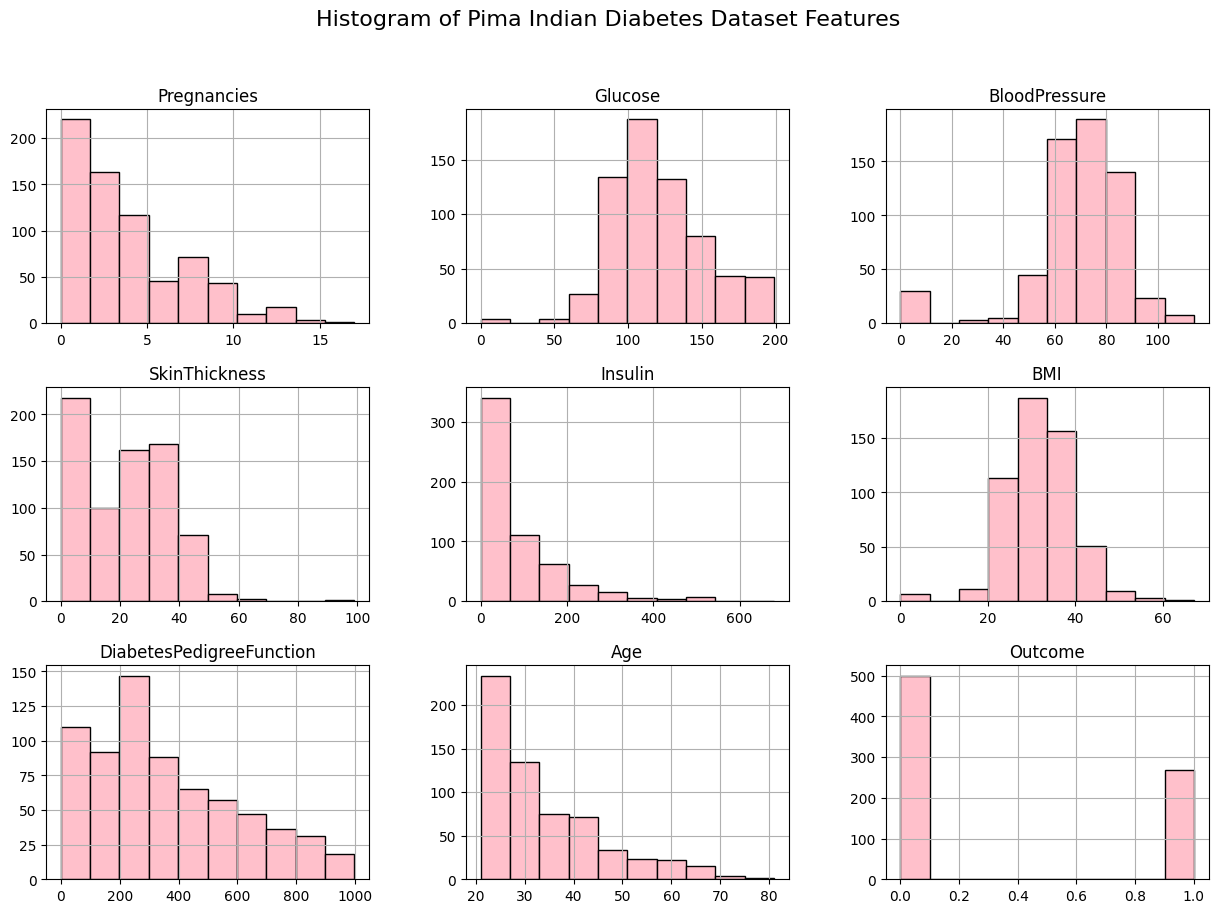

In [ ]:
def plot_histogram(data):
  data.hist(bins=10, figsize=(15,10), layout=(3,3),
            color='pink', edgecolor='black')
  plt.suptitle('Histogram of Pima Indian Diabetes Dataset Features', fontsize = 16)
  plt.show()

plot_histogram(df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

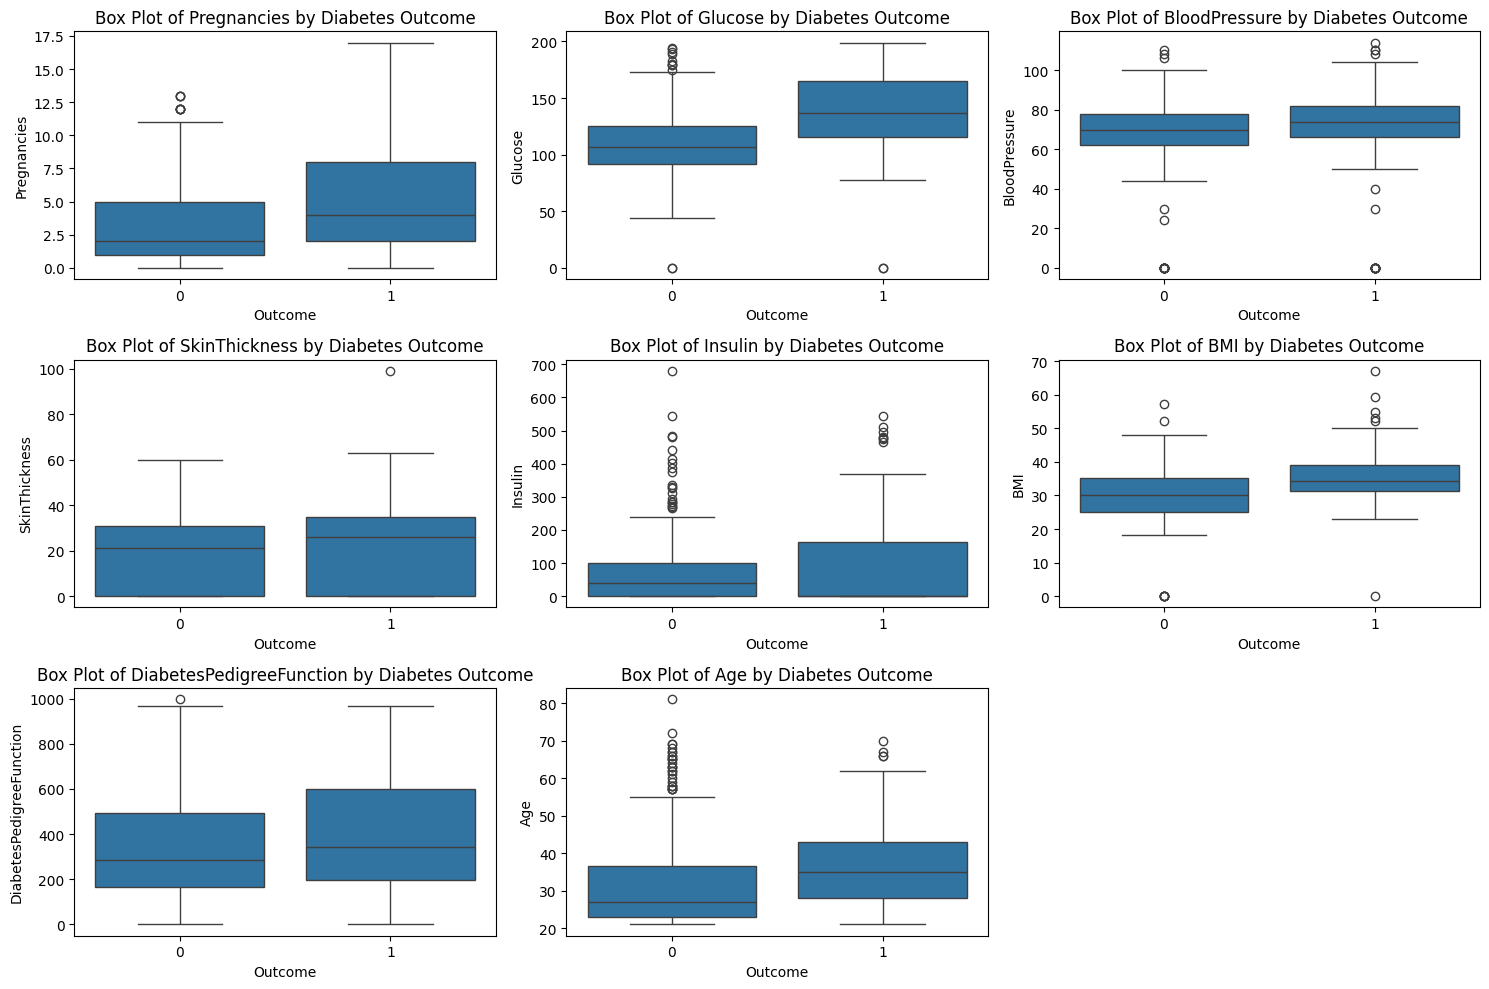

In [ ]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='Outcome', y=column, data=data)
        plt.title(f'Box Plot of {column} by Diabetes Outcome')
    plt.tight_layout()
    plt.show()

plot_boxplots(df)

<Axes: >

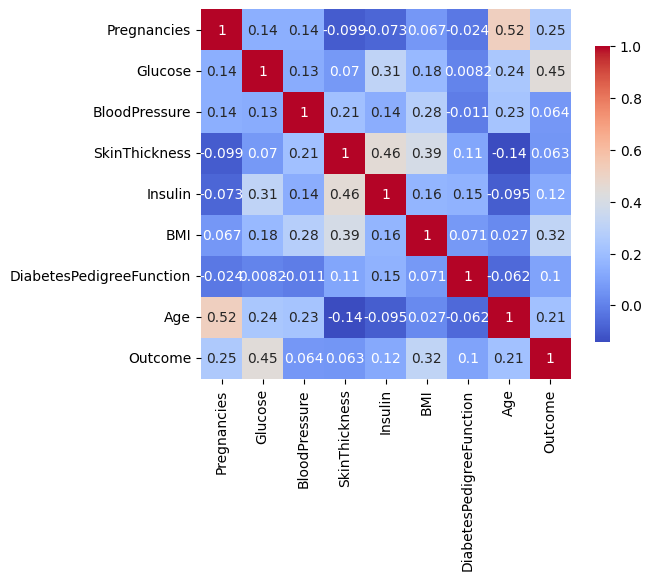

In [ ]:
# Calculate correlation matrix excluding non-numeric columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

In [ ]:
df_text = pd.read_excel('/content/foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


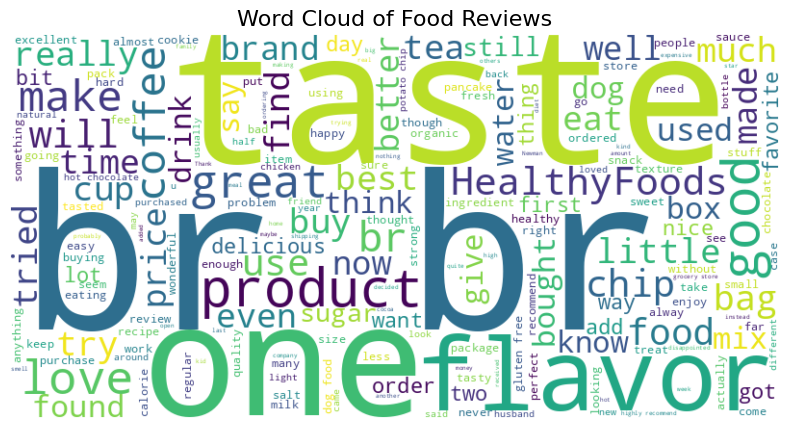

In [ ]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Food Reviews', fontsize=16)
  plt.show()

plot_wordcloud(text)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.00,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.00,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.00,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.00,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,171.00,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.34,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,245.00,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [ ]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

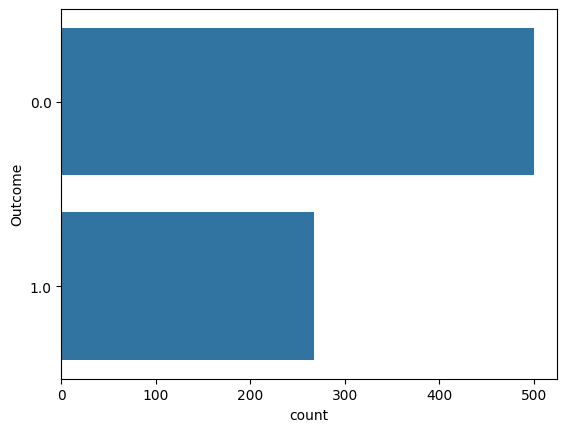

In [ ]:
sns.countplot(data=df, y=y)

<Axes: xlabel='count', ylabel='Outcome'>

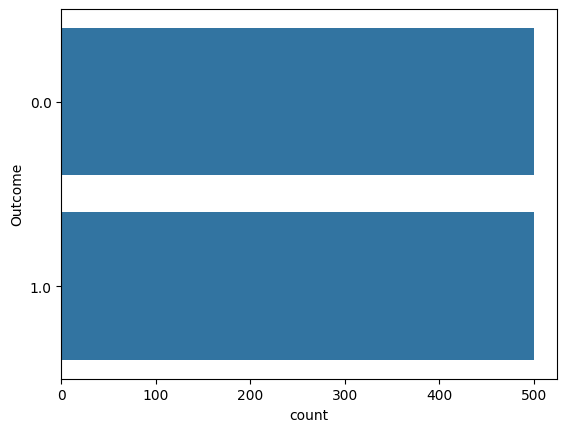

In [ ]:
sns.countplot(data=x_resampled, y=y_resampled)

In [ ]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

NameError: name 'StandardScaler' is not defined